In [1]:
import numpy as np
from threading import Thread, Lock
import pandas as pd
import requests
import time
import matplotlib.pyplot as plt
from scipy.signal import find_peaks,argrelmin
from Chart_Data_Extraction import requestDailyAdjusted
from utils import ApiInformation, \
                    ThreadInformation,\
                    plotWithSignals, \
                    item_batcher, \
                    list_batcher, \
                    chart_data_requesting
API_KEY = "&apikey=94VAKAGALC5KMWMV"
API_URL = "https://www.alphavantage.co/query?"

In [2]:
NUMBER_OF_THREADS = 5

API_INFO = ApiInformation(API_KEY,API_URL)

In [3]:
#create thread_lock object to lock the storage
storage_lock = Lock()

#create thread_lock object to signal the main thread that the acquiring thread is finished
finished_lock = Lock()

#store the threads
threads = []

#read in tickers
tickers = pd.read_parquet('tickers.parquet.gzip')

tickers = tickers.Symbol.values

#create storage dict
storage = {}

#batch the tickers for the threads
ticker_batches = list_batcher(tickers, NUMBER_OF_THREADS)

Thread_INFO = ThreadInformation(storage_lock, finished_lock)

In [4]:
#%%timeit -r 1 -n 1

for i in range(NUMBER_OF_THREADS):
    t = Thread(target=chart_data_requesting, args=(i,ticker_batches[i], storage, API_INFO, Thread_INFO))
    t.start()
    threads.append(t)
    
for c in threads:
    c.join()
    
data = pd.DataFrame(storage)
data

,ETR,EMR,AOS,MMM,ABT,NTRS,LLY,NOC,ENPH,NSC
0,106.84,94.99,64.09,141.15,114.89,111.98,280.65,440.63,190.19,271.61
1,108.65,95.46,64.93,142.39,115.78,113.00,284.11,448.18,197.84,273.89
2,110.67,96.19,65.66,143.80,116.89,115.56,285.42,451.73,193.81,277.62
3,111.17,95.90,65.35,142.86,117.91,114.55,288.03,440.51,195.52,278.85
4,112.16,96.72,66.16,145.35,118.10,116.26,284.80,440.03,202.36,279.87
...,...,...,...,...,...,...,...,...,...,...
245,105.09,80.53,66.67,102.78,97.80,84.61,329.47,448.90,205.76,205.18
246,105.90,81.92,67.37,104.21,99.03,85.62,329.53,450.15,201.10,207.44
247,104.57,80.84,65.47,103.02,97.01,81.73,329.18,443.60,183.64,203.90
248,106.07,82.27,66.45,104.31,97.87,84.29,333.60,449.26,192.51,205.33


In [5]:
_,p = requestDailyAdjusted('AAPL', API_INFO)

# High Performance Trading Signal Algorithm

The goal is to develop a high performance program written in Python 3 to generate trading Signals which are extracted from multiple indicators. The data will be pulled from an API, then it will be cleaned and filtered and afterwards the trading signals will be extracted from the time series data.
Finally we develop an algorithm which decides whether a trade should be executed or not based on the overall signals given by the indicators.

# Performance 
The high performance aspect is in focus because we will handle historic price data from the S&P500 stocks for the last 30+ years so fast execution is necessary. Therefore we should use the following techniques and tools for performance:

- **Multithreading**: the build in Python Library threading provides known tools like Thread creation and lock handling
- **Cython**: We extend our Python Code to Cython. This can give performance boost at heavy calculations by up to 1000 times faster execution
- **Numpy**: Additionally to Cython we will use Numpy to leverage C speed execution with vectorization of Numpy arrays


# Signals

The signals which will be extracted from indicators should give trading ideas like these:

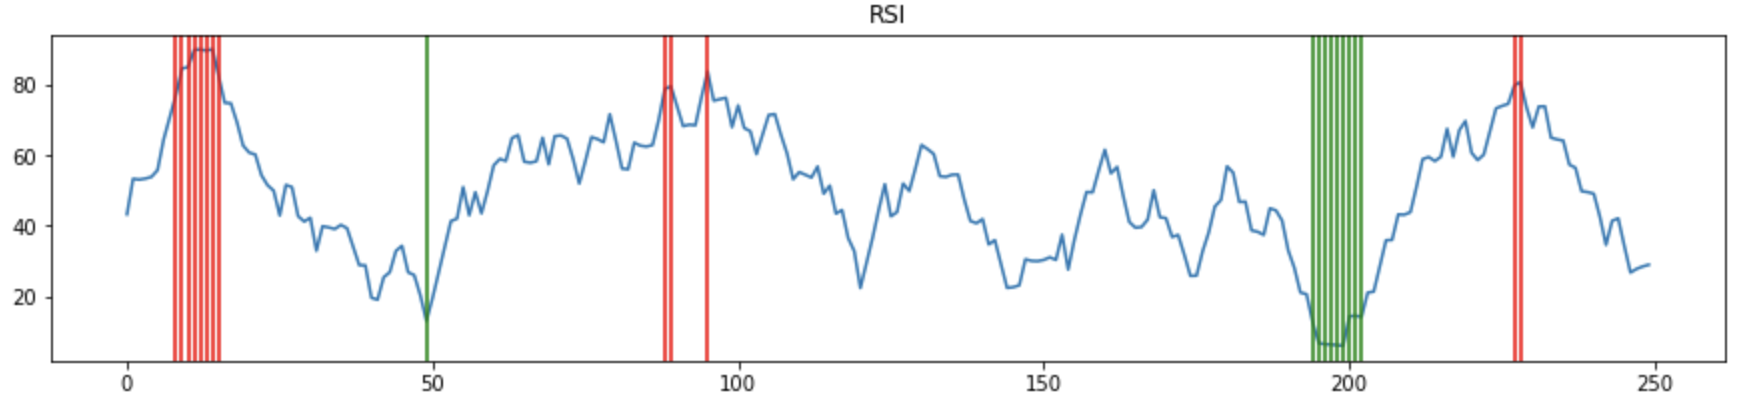

In [ ]:
#idee für weiteres vorgehen:

#1: Variante bauen um für eine Aktie extrem schnell die Daten zu ziehen und anzuzeigen

#2: Task Queue bauen, diese mit den Anzahl der Indikatoren x 500 x Berechnungen befüllen
#3: dict struktur anlegen, die dann wie folgt befüllt wird:
#.  - jeder Thread befüllt sein eigenes dict, am ende wird gemerged

#
# data = {
#     'AAPL' : {
#                MFI:chart : [],
#                MFI-overbought : [],
#                MFI-oversold : []
#      }     
#
#
#}
#
#